<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_buildTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given pre-order and in-order traversals of a binary tree, write a function to reconstruct the tree.

For example, given the following preorder traversal:

[a, b, d, e, c, f, g]

And the following inorder traversal:

[d, b, e, a, f, c, g]

You should return the following tree:

````

    a
   / \
  b   c
 / \ / \
d  e f  g

````

##Solution:
To reconstruct a binary tree from its pre-order and in-order traversals, you can follow a recursive approach. The first element in the pre-order list is always the root of the tree. Using this element, you can divide the in-order list into two parts: the left subtree and the right subtree. Then, you recursively build each subtree using the same process.

Function `buildTree` takes the `preorder` and `inorder` traversal lists as input and returns the root of the reconstructed binary tree. The `printTree` function is used to print the tree in a readable format.

##Implementation:

In [12]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def buildTree(preorder, inorder):
    if not preorder or not inorder:
        return None

    # The first element in preorder is the root.
    root = TreeNode(preorder[0])
    mid = inorder.index(preorder[0])

    # Recursively build the left and right subtrees.
    root.left = buildTree(preorder[1:mid+1], inorder[:mid])
    root.right = buildTree(preorder[mid+1:], inorder[mid+1:])

    return root

def printTree(root, indent = ""):
    if root:
        print(indent + str(root.val))
        printTree(root.left, indent + "  ")
        printTree(root.right, indent + "  ")

# Example usage
preorder = ['a', 'b', 'd', 'e', 'c', 'f', 'g']
inorder = ['d', 'b', 'e', 'a', 'f', 'c', 'g']
tree = buildTree(preorder, inorder)
printTree(tree)


a
  b
    d
    e
  c
    f
    g


##Testing Graphically:

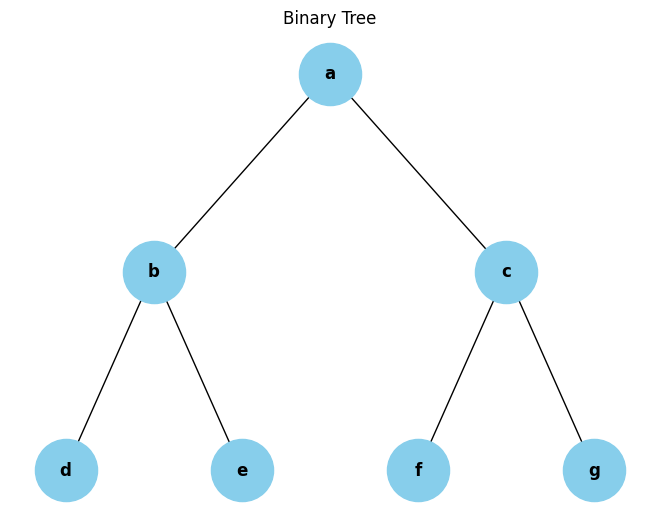

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.val, pos=(x, y))
        if node.left:
            graph.add_edge(node.val, node.left.val)
            add_edges(graph, node.left, pos, x - 1 / layer, y - 1, layer + 1)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            add_edges(graph, node.right, pos, x + 1 / layer, y - 1, layer + 1)

def draw_tree(root):
    graph = nx.DiGraph()
    add_edges(graph, root, pos=nx.get_node_attributes(graph, 'pos'))

    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, arrows=False, node_size=2000, node_color="skyblue", font_size=12, font_weight='bold')
    plt.title("Binary Tree")
    plt.show()

# Draw the tree
draw_tree(tree)
